In [2]:
#Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Create a set of random longitude and latitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Add the lats and lngs to a list. 
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c08c33e7f1895c9e5106246421673330


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c08c33e7f1895c9e5106246421673330&q=Boston


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | auch
Processing Record 5 of Set 1 | quibdo
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | utiroa
City not found. Skipping...
Processing Record 8 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 9 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 15 of Set 1 | bose
Processing Record 16 of Set 1 | hermiston
Processing Record 17 of Set 1 | yulara
Processing Record 18 of Set 1 | sarkand
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | cleveland
Proc

Processing Record 36 of Set 4 | pacifica
Processing Record 37 of Set 4 | manokwari
Processing Record 38 of Set 4 | banmo
City not found. Skipping...
Processing Record 39 of Set 4 | harrisburg
Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | bianzhuang
Processing Record 42 of Set 4 | marcona
City not found. Skipping...
Processing Record 43 of Set 4 | atar
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | volsk
Processing Record 46 of Set 4 | grindavik
Processing Record 47 of Set 4 | manglaur
Processing Record 48 of Set 4 | champerico
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | port blair
Processing Record 1 of Set 5 | barranca
Processing Record 2 of Set 5 | jomalig
City not found. Skipping...
Processing Record 3 of Set 5 | sumbawa
City not found. Skipping...
Processing Record 4 of Set 5 | broome
Processing Record 5 of Set 5 | verkhnyaya inta
Processing Record 6 of Set 5 | nyagan
Processing Record 7 of Set 5 | pev

Processing Record 23 of Set 8 | jumla
Processing Record 24 of Set 8 | linhares
Processing Record 25 of Set 8 | lianyuan
Processing Record 26 of Set 8 | acarau
Processing Record 27 of Set 8 | najran
Processing Record 28 of Set 8 | marawi
Processing Record 29 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 30 of Set 8 | denpasar
Processing Record 31 of Set 8 | kushima
Processing Record 32 of Set 8 | nageshwari
Processing Record 33 of Set 8 | colesberg
Processing Record 34 of Set 8 | pingdingshan
Processing Record 35 of Set 8 | tshela
Processing Record 36 of Set 8 | redmond
Processing Record 37 of Set 8 | lisakovsk
Processing Record 38 of Set 8 | yar-sale
Processing Record 39 of Set 8 | coihaique
Processing Record 40 of Set 8 | kloulklubed
Processing Record 41 of Set 8 | sakakah
Processing Record 42 of Set 8 | karakendzha
City not found. Skipping...
Processing Record 43 of Set 8 | nome
Processing Record 44 of Set 8 | constantine
Processing Record 45 of Set 8 | broken hil

Processing Record 9 of Set 12 | wahiawa
Processing Record 10 of Set 12 | tecolutla
Processing Record 11 of Set 12 | sept-iles
Processing Record 12 of Set 12 | mecca
Processing Record 13 of Set 12 | hiroshima
Processing Record 14 of Set 12 | kungurtug
Processing Record 15 of Set 12 | turukhansk
Processing Record 16 of Set 12 | canete
Processing Record 17 of Set 12 | mae sai
Processing Record 18 of Set 12 | nisia floresta
Processing Record 19 of Set 12 | mweka
Processing Record 20 of Set 12 | aksarka
Processing Record 21 of Set 12 | krasnovishersk
Processing Record 22 of Set 12 | kibala
Processing Record 23 of Set 12 | zhezkazgan
Processing Record 24 of Set 12 | morwell
Processing Record 25 of Set 12 | sorland
Processing Record 26 of Set 12 | moberly
Processing Record 27 of Set 12 | kristiinankaupunki
Processing Record 28 of Set 12 | tulum
Processing Record 29 of Set 12 | mragowo
Processing Record 30 of Set 12 | sibay
Processing Record 31 of Set 12 | macenta
Processing Record 32 of Set 1

In [17]:
len(city_data)

555

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taltal,-25.4000,-70.4833,70.29,59,20,6.91,CL,2021-01-12 18:18:52
1,Severo-Kurilsk,50.6789,156.1250,17.82,89,96,11.97,RU,2021-01-12 18:18:52
2,Souillac,-20.5167,57.5167,77.00,100,75,14.97,MU,2021-01-12 18:18:53
3,Auch,43.6500,0.5833,44.01,62,91,5.01,FR,2021-01-12 18:18:53
4,Quibdo,5.6947,-76.6611,91.56,52,45,2.73,CO,2021-01-12 18:18:53
5,Butaritari,3.0707,172.7902,81.30,80,90,20.85,KI,2021-01-12 18:18:53
6,Vaini,-21.2000,-175.2000,78.80,94,75,6.91,TO,2021-01-12 18:18:54
7,Saint George,37.1041,-113.5841,33.80,37,1,2.73,US,2021-01-12 18:14:12
8,Hasaki,35.7333,140.8333,33.80,100,20,3.44,JP,2021-01-12 18:18:55
9,Albany,42.6001,-73.9662,35.01,58,100,1.99,US,2021-01-12 18:18:55


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data_cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610475679.5599022

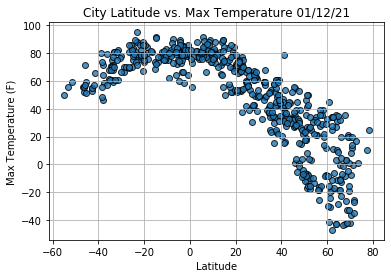

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data_Fig1.png")

# Show plot.
plt.show()

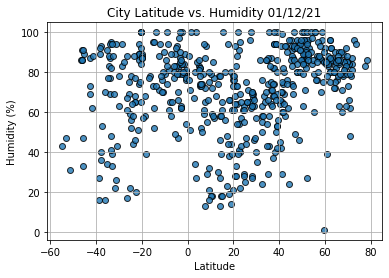

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data_Fig2.png")

# Show plot.
plt.show()

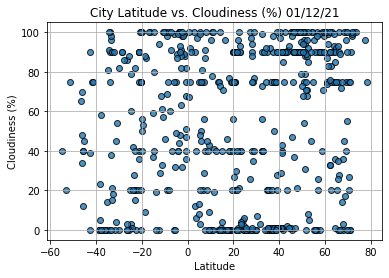

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data_Fig3.png")
# Show plot.
plt.show()

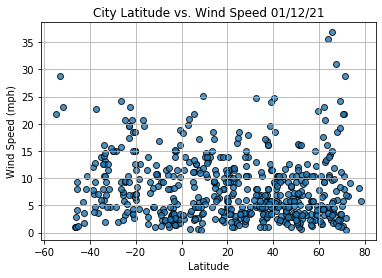

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data_Fig4.png")

# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Severo-Kurilsk,50.6789,156.1250,17.82,89,96,11.97,RU,2021-01-12 18:18:52
3,Auch,43.6500,0.5833,44.01,62,91,5.01,FR,2021-01-12 18:18:53
4,Quibdo,5.6947,-76.6611,91.56,52,45,2.73,CO,2021-01-12 18:18:53
5,Butaritari,3.0707,172.7902,81.30,80,90,20.85,KI,2021-01-12 18:18:53
7,Saint George,37.1041,-113.5841,33.80,37,1,2.73,US,2021-01-12 18:14:12


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

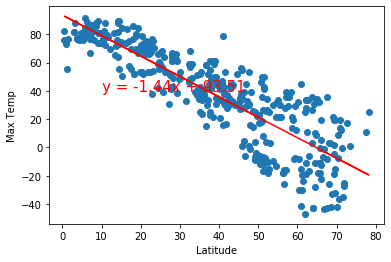

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

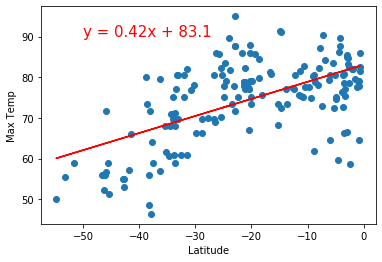

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

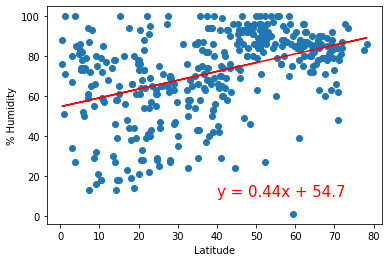

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

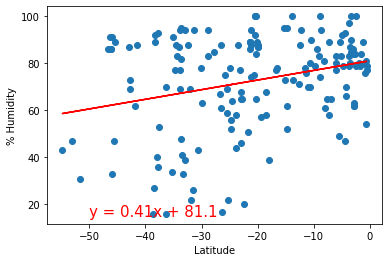

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

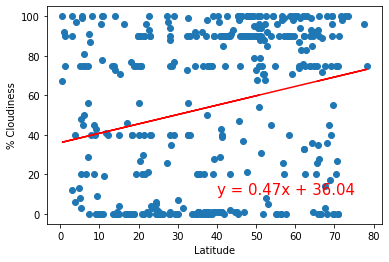

In [43]:
# Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

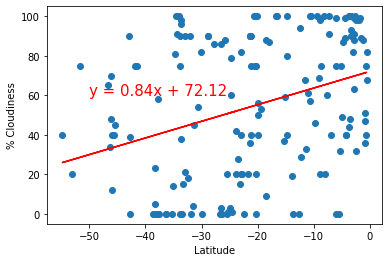

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

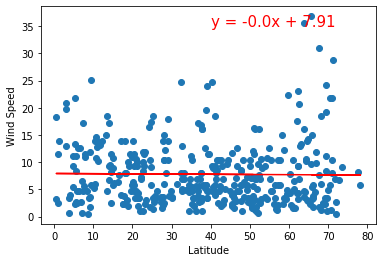

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

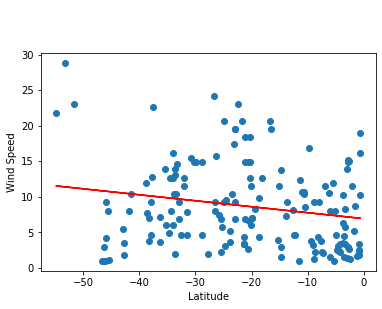

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))